# binomial Approximation

At times, particularly when the probability of success is extremely low or the number of trials is exceedingly high, computing the binomial probability mass function (PMF) can pose significant challenges for computers. In such cases, we can capitalize on our understanding of either the `Normal` or `Poisson` distributions.

Here, I illustrate an example of approximating a binomial distribution using the Normal distribution.

**_____________________________________________________________________________________________________________________________**

**Question:**

Picture yourself working in a company with 3158 employees. You're planning to invite them to a party, and the probability of each employee accepting your offer is 0.38. Now, what is the probability that more than 1500 people will attend your party? (By the way, you'll need to buy them pizza!)




**Solution 1: Binomial**

$$P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}$$

In [13]:
import matplotlib.pyplot as plt
import math
from scipy import stats
import numpy as np

In [5]:
def binomial(n:int, p:float, k:int):
    """probability density function for a binomial
    random variable
    
    parameters
    ----------
    n: int
    number of trials
    
    p:float
    probability of success
    
    k:int
    desired number of success
    
    
    return
    ----------
    assigned probability
    """
    
    # calculate the binomial coefficient
    binCoeff = math.comb(n, k)
    
    success = np.power(p, k)
    fail = np.power(1-p, n-k)
    
    return binCoeff*success*fail

In [8]:
n = 3158 # trials
p = 0.38 # probability of each person attending 
k = 1500 # desired number of success
print("probability of more that 1500 guests is :", binomial(n, p, k))

OverflowError: int too large to convert to float

### Oops! looks like binomial is not a good approach!

regualr Computers (like mine) are unable to calculate this!

## Solution 2: Normal approximation

Binomial distributions consist of 'n' independent Bernoulli trials. According to the **Central Limit Theorem**, normal distribution can be employed to approximate binomials.

**Important Note**: When seeking a more accurate approximation, it's crucial to recognize that you are approximating something discrete with a continuous random variable. Therefore, incorporating continuity correction is essential. For example, calculate P(X > 1500.5) instead of P(X > 1500).

We have:
- n = 3158
- p = 0.38
- k = 1500

For utilizing a Normal random variable, we require the mean and variance, which can be set to the expected value and variance of a binomial random variable.

$$\mu = np$$
$$\sigma^2 = np(1-p)$$

then we can use:

$$\Phi\left(\frac{{x - \mu}}{{\sigma}}\right)$$

In [37]:
n = 3158 # trials
p = 0.38 # probability of each person attending 
k = 1500.5 # desired number of success

mu = n*p

sigma = n*p*(1-p)

phiInp = (1500 - mu)/sigma

prob = 1 - stats.norm(0, 1).cdf(phiInp)
print("probability of more that 1500 guests is: ", prob)

probability of more that 1500 guests is:  0.34341577516073296


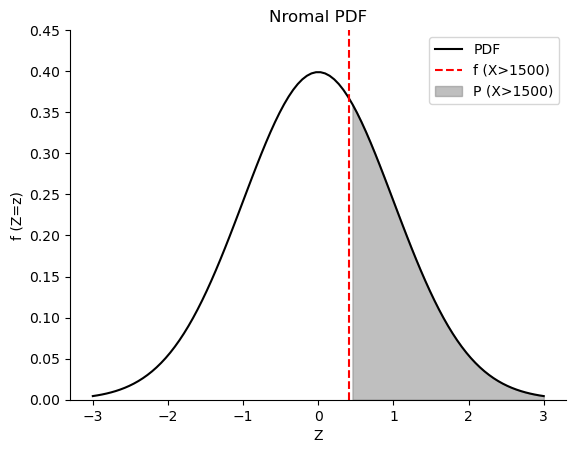

In [39]:
xVal = np.linspace(-3, 3, 100)
yVal = np.exp(-0.5 * xVal**2) / np.sqrt(2 * np.pi)

plt.figure()

# Plot the curve
plt.plot(xVal, yVal, color="black", label='PDF')

# Add a vertical line
plt.axvline(phiInp, color="red", linestyle='--', label='f (X>1500)')

# Fill the area under the curve to the right of the line
plt.fill_between(xVal[xVal >= phiInp], yVal[xVal >= phiInp], color='gray', alpha=0.5, label='P (X>1500)')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.title("Nromal PDF")
plt.ylabel("f (Z=z)")
plt.xlabel("Z")

plt.ylim(0, 0.45)
plt.legend()
plt.show()
